# Cassava Leaf Disease Classification

# Importing libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [32]:
import os
from PIL import Image
from IPython.display import display
import cv2
import glob
import wandb

In [33]:
wandb.init(project="Cassava_Classification")

wandb: Currently logged in as: enesuguroglu (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.15 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


# Data Loading

In [3]:

train_transform = transforms.Compose([
   transforms.RandomRotation(10),
   transforms.RandomHorizontalFlip(),
   transforms.Resize(224),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225]) 
])

In [4]:
test_transform = transforms.Compose([
   transforms.Resize(224),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3
...,...,...
21392,999068805.jpg,3
21393,999329392.jpg,3
21394,999474432.jpg,1
21395,999616605.jpg,4


In [8]:
df0 = df[df['label']==0]

In [9]:
df0.head()

,image_id,label
0,1000015157.jpg,0
7,1001320321.jpg,0
18,1003888281.jpg,0
73,1012426959.jpg,0
109,1018973237.jpg,0


In [10]:
df1 = df[df['label']==1]

In [11]:
df1.head()

,image_id,label
2,100042118.jpg,1
3,1000723321.jpg,1
12,1002088496.jpg,1
22,1004389140.jpg,1
41,1008142548.jpg,1


In [12]:
df2 = df[df['label']==2]

In [13]:
df3 = df[df['label']==3]

In [14]:
df4 = df[df['label']==4]

In [15]:
df2

,image_id,label
6,1000910826.jpg,2
15,1003218714.jpg,2
24,100472565.jpg,2
25,1004826518.jpg,2
28,1005200906.jpg,2
...,...,...
21329,984892057.jpg,2
21374,995155483.jpg,2
21381,996947690.jpg,2
21385,997289539.jpg,2


In [16]:
df3

,image_id,label
1,1000201771.jpg,3
4,1000812911.jpg,3
5,1000837476.jpg,3
9,1001742395.jpg,3
10,1001749118.jpg,3
...,...,...
21386,997485103.jpg,3
21387,997651546.jpg,3
21388,997857988.jpg,3
21392,999068805.jpg,3


In [17]:
df4

,image_id,label
8,1001723730.jpg,4
17,1003442061.jpg,4
30,100560400.jpg,4
47,1009126931.jpg,4
62,1010806468.jpg,4
...,...,...
21367,993984792.jpg,4
21372,995075067.jpg,4
21373,995123333.jpg,4
21395,999616605.jpg,4


In [17]:
CBB_0 = df0['image_id']

In [19]:
CBB_0 = list(CBB_0)

In [20]:
CBSD_1 = df1['image_id']

In [21]:
CBSD_1 = list(CBSD_1)

In [22]:
CGM_2 = df2['image_id']

In [23]:
CGM_2 = list(CGM_2)

In [24]:
CMD_3 = df3['image_id']

In [25]:
CMD_3 = list(CMD_3)

In [26]:
Healty_4 = df4['image_id']

In [27]:
Healty_4 = list(Healty_4)

In [31]:
images_CBB_0 = [cv2.imread(file) for file in glob.glob("data/train/*") if file.split("\\")[1] in CBB_0]

In [32]:
image_names_CBB_0 = [name.split("\\")[1] for name in glob.glob("data/train/*") if name.split("\\")[1] in CBB_0]

In [33]:
images_CBSD_1 = [cv2.imread(file) for file in glob.glob("data/train/*") if file.split("\\")[1] in CBSD_1]

In [34]:
image_names_CBSD_1 = [name.split("\\")[1] for name in glob.glob("data/train/*") if name.split("\\")[1] in CBSD_1]

In [35]:
images_CGM_2 = [cv2.imread(file) for file in glob.glob("data/train/*") if file.split("\\")[1] in CGM_2]

In [36]:
image_names_CGM_2 = [name.split("\\")[1] for name in glob.glob("data/train/*") if name.split("\\")[1] in CGM_2]

In [37]:
images_CMD_3 = [cv2.imread(file) for file in glob.glob("data/train/*") if file.split("\\")[1] in CMD_3]

In [38]:
image_names_CMD_3 = [name.split("\\")[1] for name in glob.glob("data/train/*") if name.split("\\")[1] in CMD_3]

In [39]:
images_Healty_4 = [cv2.imread(file) for file in glob.glob("data/train/*") if file.split("\\")[1] in Healty_4]

In [40]:
image_names_Healty_4 = [name.split("\\")[1] for name in glob.glob("data/train/*") if name.split("\\")[1] in Healty_4]

In [43]:
for i,image in enumerate(images_CBB_0):
    cv2.imwrite('0/{}'.format(image_names_CBB_0[i]),image)

In [44]:
for i,image in enumerate(images_CBSD_1):
    cv2.imwrite('1/{}'.format(image_names_CBSD_1[i]),image)

In [45]:
for i,image in enumerate(images_CGM_2):
    cv2.imwrite('2/{}'.format(image_names_CGM_2[i]),image)

In [46]:
for i,image in enumerate(images_CMD_3):
    cv2.imwrite('3/{}'.format(image_names_CMD_3[i]),image)

In [47]:
for i,image in enumerate(images_Healty_4):
    cv2.imwrite('4/{}'.format(image_names_Healty_4[i]),image)

In [18]:
root = 'data/'

train_data = datasets.ImageFolder(os.path.join(root,'train'),transform=train_transform)
#we can just cast train root completely in imagefolder() paranthesis
test_data = datasets.ImageFolder(os.path.join(root,'test'),transform=test_transform)

train_loader = DataLoader(train_data,batch_size=10,shuffle=True,pin_memory=True)
test_loader = DataLoader(test_data,batch_size=10,pin_memory=True)

class_names = train_data.classes # specify classes

In [19]:
class_names

['0', '1', '2', '3', '4']

In [20]:
len(train_data)

19237

In [21]:
len(test_data)

2160

In [22]:
for i,(images,labels) in enumerate(train_loader):
    break

In [23]:
images.shape

torch.Size([10, 3, 224, 224])

# Data visualization

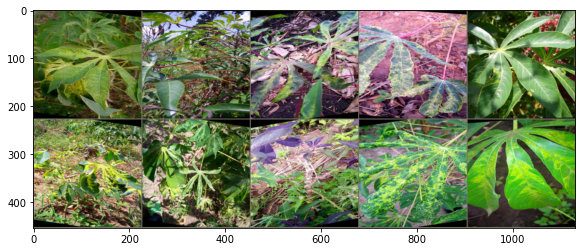

In [24]:
im = make_grid(images, nrow=5)  # the default nrow is 8

# Inverse normalize the images
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)))

# Convolutional Neural Network

In [25]:
class ConvolutionalNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(54*54*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,5)
        
    def forward(self,X):
        
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,54*54*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X,dim=1)

# Defining cost function and optimization

In [26]:
model = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [27]:
model = model.to(device)

In [28]:
model

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=5, bias=True)
)

In [29]:
for param in model.parameters():
    print(param.numel())

162
6
864
16
5598720
120
10080
84
420
5


# Training

In [34]:
import time
start_time = time.time()

epochs = 20

#Limits on numbers of batches if you want train faster(Not mandatory)
#max_trn_batch = 800 # batch 10 image --> 8000 images total
#max_tst_batch = 200 # batch 10 image --> 3000 images total


train_losses = []
test_losses = []
train_correct = []
test_correct = []
accuracy = []

wandb.watch(model,criterion,log="all")
for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0
    
    for b,(X_train,y_train) in enumerate(train_loader):
        X_train,y_train = X_train.to(device),y_train.to(device)
        

        b = b + 1
        
        y_pred = model(X_train)
        loss = criterion(y_pred,y_train)
        
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr = trn_corr + batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200 == 0:
            print('Epoch:  {} Loss:  {} Accuracy:  {}'.format(i,loss,trn_corr.item()*100/(10*b)))
            accuracy.append((trn_corr//(b/10)))
            wandb.log({'loss':loss.item(),'Epoch':i,'accuracy':trn_corr//(b/10)})
            
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    
    #test set
    
    with torch.no_grad():
        for b,(X_test,y_test) in enumerate(test_loader):
            X_test,y_test = X_test.to(device),y_test.to(device)

            y_val = model(X_test)
            predicted = torch.max(y_val.data,1)[1]
            batch_corr = (predicted == y_test).sum()
            tst_corr = tst_corr + batch_corr
    
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
            
    
total_time = time.time() - start_time
print(f'Total Time: {total_time/60}) minutes')

Epoch:  0 Loss:  1.3978221416473389 Accuracy:  60.55
Epoch:  0 Loss:  1.137310266494751 Accuracy:  61.55
Epoch:  0 Loss:  0.8643261194229126 Accuracy:  62.28333333333333
Epoch:  0 Loss:  0.6251185536384583 Accuracy:  62.55
Epoch:  0 Loss:  1.1867157220840454 Accuracy:  62.23
Epoch:  0 Loss:  0.8602368235588074 Accuracy:  62.4
Epoch:  0 Loss:  1.156006097793579 Accuracy:  62.81428571428572
Epoch:  0 Loss:  0.863665759563446 Accuracy:  62.79375
Epoch:  0 Loss:  1.5035291910171509 Accuracy:  62.87777777777778
Epoch:  1 Loss:  1.3754909038543701 Accuracy:  63.75
Epoch:  1 Loss:  0.9673145413398743 Accuracy:  64.5
Epoch:  1 Loss:  0.896270751953125 Accuracy:  65.15
Epoch:  1 Loss:  0.5776530504226685 Accuracy:  65.6125
Epoch:  1 Loss:  1.1908305883407593 Accuracy:  65.66
Epoch:  1 Loss:  0.9745203256607056 Accuracy:  65.7
Epoch:  1 Loss:  1.2441461086273193 Accuracy:  65.80714285714286
Epoch:  1 Loss:  0.5592077970504761 Accuracy:  65.83125
Epoch:  1 Loss:  0.8547972440719604 Accuracy:  65.

Epoch:  15 Loss:  0.8600884675979614 Accuracy:  79.81111111111112
Epoch:  16 Loss:  0.21151050925254822 Accuracy:  80.25
Epoch:  16 Loss:  0.43047475814819336 Accuracy:  79.775
Epoch:  16 Loss:  0.439598023891449 Accuracy:  80.03333333333333
Epoch:  16 Loss:  0.5912317037582397 Accuracy:  79.7875
Epoch:  16 Loss:  0.1638762354850769 Accuracy:  80.01
Epoch:  16 Loss:  0.48183220624923706 Accuracy:  80.075
Epoch:  16 Loss:  0.6542268991470337 Accuracy:  79.99285714285715
Epoch:  16 Loss:  0.4603968560695648 Accuracy:  79.95625
Epoch:  16 Loss:  0.5217682123184204 Accuracy:  79.91111111111111
Epoch:  17 Loss:  0.436279296875 Accuracy:  81.55
Epoch:  17 Loss:  0.23752720654010773 Accuracy:  81.15
Epoch:  17 Loss:  0.10127314180135727 Accuracy:  81.01666666666667
Epoch:  17 Loss:  0.5922671556472778 Accuracy:  80.8125
Epoch:  17 Loss:  0.6244436502456665 Accuracy:  80.56
Epoch:  17 Loss:  0.3883454203605652 Accuracy:  80.61666666666666
Epoch:  17 Loss:  0.7333293557167053 Accuracy:  80.7285

In [35]:
torch.save(model.state_dict(),'Cassiva_model.pt')

# Results

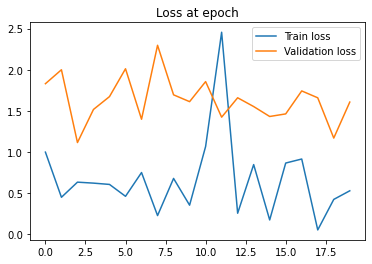

In [36]:
plt.plot(train_losses,label='Train loss')
plt.plot(test_losses,label='Validation loss')
plt.title('Loss at epoch')
plt.legend()
plt.show()

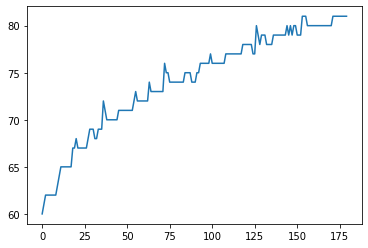

In [39]:
plt.plot(range(180),accuracy) # Accuracy per batch